<a href="https://colab.research.google.com/github/AdamSe22/Transfert_learning-flower-recognition-/blob/main/Cnn%20Architecture" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
import shutil
import os

# Définir le chemin de Google Drive
drive_path = '/content/drive/My Drive/flowers_dataset'

# Télécharger le dataset dans le répertoire par défaut
path = kagglehub.dataset_download("nipunarora8/age-gender-and-ethnicity-face-data-csv")

# Afficher le chemin où le dataset a été téléchargé
print("Path to dataset files:", path)

# Si vous voulez déplacer le dataset téléchargé dans Google Drive, vous pouvez le faire comme suit
# Par exemple, si le dataset est téléchargé dans un dossier "flowers" local :
local_download_path = os.path.join(path, "Ages")

# Créer un dossier dans Google Drive si nécessaire
if not os.path.exists(drive_path):
    os.makedirs(drive_path)

# Déplacer les fichiers téléchargés dans Google Drive
shutil.move(local_download_path, drive_path)

print(f"Dataset moved to Google Drive at: {drive_path}")


Path to dataset files: /root/.cache/kagglehub/datasets/l3llff/flowers/versions/4
Dataset moved to Google Drive at: /content/drive/My Drive/flowers_dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
# prompt: creee dex variable de train et test pour les fleurs de ce chemin : /content/drive/MyDrive/flowers_dataset/flowers

import os
import shutil
import random
from sklearn.model_selection import train_test_split

# Chemin vers le dataset de fleurs
flowers_dataset_path = "/content/drive/MyDrive/flowers_dataset/flowers"

# Vérifier si le chemin existe
if not os.path.exists(flowers_dataset_path):
    print(f"Error: Dataset path not found: {flowers_dataset_path}")
else:
    # Obtenir la liste de toutes les images et leurs chemins
    all_image_paths = []
    for root, _, files in os.walk(flowers_dataset_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Ajouter d'autres extensions si nécessaire
                all_image_paths.append(os.path.join(root, file))

    # Diviser les images en ensembles d'entraînement et de test
    train_paths, test_paths = train_test_split(all_image_paths, test_size=0.2, random_state=42)  # 20% pour le test

    print(f"Number of training images: {len(train_paths)}")
    print(f"Number of testing images: {len(test_paths)}")

    # Créer les dossiers train et test si ils n'existent pas
    train_dir = os.path.join(flowers_dataset_path, "train")
    test_dir = os.path.join(flowers_dataset_path, "test")
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    # Déplacer les images vers les dossiers appropriés
    for image_path in train_paths :
      category = image_path.split('/')[-2]
      category_dir = os.path.join(train_dir, category)
      os.makedirs(category_dir, exist_ok=True)
      shutil.copy(image_path, category_dir)

    for image_path in test_paths :
      category = image_path.split('/')[-2]
      category_dir = os.path.join(test_dir, category)
      os.makedirs(category_dir, exist_ok=True)
      shutil.copy(image_path, category_dir)


    print("Train et test dataset crées avec succès")

Number of training images: 12592
Number of testing images: 3148
Train et test dataset crées avec succès


In [ ]:
train = '/content/drive/MyDrive/flowers_dataset/flowers/train'
test = '/content/drive/MyDrive/flowers_dataset/flowers/test'


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob as gb

size = []
for folder in os.listdir(train):
  files =  gb.glob(pathname = str(train + '/' + folder + '/*.jpg'))
  for file in files:
    img = plt.imread(file)
    size.append(img.shape)
pd.Series(size).value_counts()

In [ ]:

import pandas as pd

filtered_sizes = pd.Series(size)[pd.Series(size) < (256, 256, 3)]
filtered_sizes.count()

9

In [ ]:
import cv2
X_train = []
Y_train = []
for folder in os.listdir(train):
  files =  gb.glob(pathname = str(train + '/' + folder + '/*.jpg'))
  for file in files:
    img = cv2.imread(file)
    img_array = cv2.resize(img, (256,256))
    X_train.append(list(img_array))
    Y_train.append(folder)

Chargina les images

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to your dataset
train_dir = '/content/drive/MyDrive/flowers_dataset/flowers/train'
test_dir = '/content/drive/MyDrive/flowers_dataset/flowers/test'

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=40,  # Augmentations
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

# Loading the datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images
    batch_size=32,          # Batch size
    class_mode='categorical'  # Assuming multi-class classification
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Model training will use train_generator and test_generator


Found 12592 images belonging to 16 classes.
Found 3148 images belonging to 16 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directories for train and test data
train_dir = '/content/drive/MyDrive/flowers_dataset/flowers/train'
test_dir = '/content/drive/MyDrive/flowers_dataset/flowers/test'


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


test_datagen = ImageDataGenerator(
    rescale=1./255
)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,  # Batch size
    class_mode='categorical'  # Multi-class classification
)

# Load testing data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,  # Batch size
    class_mode='categorical'  # Multi-class classification
)

# Print class indices for reference
print("Class indices:", train_generator.class_indices)


Found 12592 images belonging to 16 classes.
Found 3148 images belonging to 16 classes.
Class indices: {'astilbe': 0, 'bellflower': 1, 'black_eyed_susan': 2, 'calendula': 3, 'california_poppy': 4, 'carnation': 5, 'common_daisy': 6, 'coreopsis': 7, 'daffodil': 8, 'dandelion': 9, 'iris': 10, 'magnolia': 11, 'rose': 12, 'sunflower': 13, 'tulip': 14, 'water_lily': 15}


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract class indices and counts from the train generator
class_indices = train_generator.class_indices  # Dictionary mapping class names to indices
class_counts = {class_name: 0 for class_name in class_indices}

# Count the number of images in each class
for _, labels in train_generator:
    for label in labels:
        class_index = label.argmax()  # Get the index of the class (one-hot encoding)
        class_name = list(class_indices.keys())[list(class_indices.values()).index(class_index)]
        class_counts[class_name] += 1
    # Stop after one complete epoch
    if train_generator.batch_index == 0:
        break

# Plot the class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))

# Add labels and title
plt.title("Number of Images per Class in Training Dataset", fontsize=16)
plt.xlabel("Class", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.show()


KeyboardInterrupt: 

In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
train_dir = '/content/drive/MyDrive/flowers_dataset/flowers/train'
test_dir = '/content/drive/MyDrive/flowers_dataset/flowers/test'

In [ ]:
def load_data(data_dir, image_size=(150, 150)):
    X = []
    Y = []
    for folder in os.listdir(data_dir):
        folder_path = os.path.join(data_dir, folder)
        if not os.path.isdir(folder_path):
            continue

        # Loop through each image in the folder
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            img = cv2.imread(file_path)
            if img is not None:
                img = cv2.resize(img, image_size)  # Resize images
                X.append(img)
                Y.append(folder)  # Use folder name as label
    return np.array(X, dtype=np.float32), np.array(Y)

In [ ]:
X_train, Y_train = load_data(train_dir)
X_test, Y_test = load_data(test_dir)

In [ ]:
X_train /= 255.0
X_test /= 255.0

In [ ]:
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_test_encoded = label_encoder.transform(Y_test)

In [ ]:
Y_train_categorical = to_categorical(Y_train_encoded)
Y_test_categorical = to_categorical(Y_test_encoded)

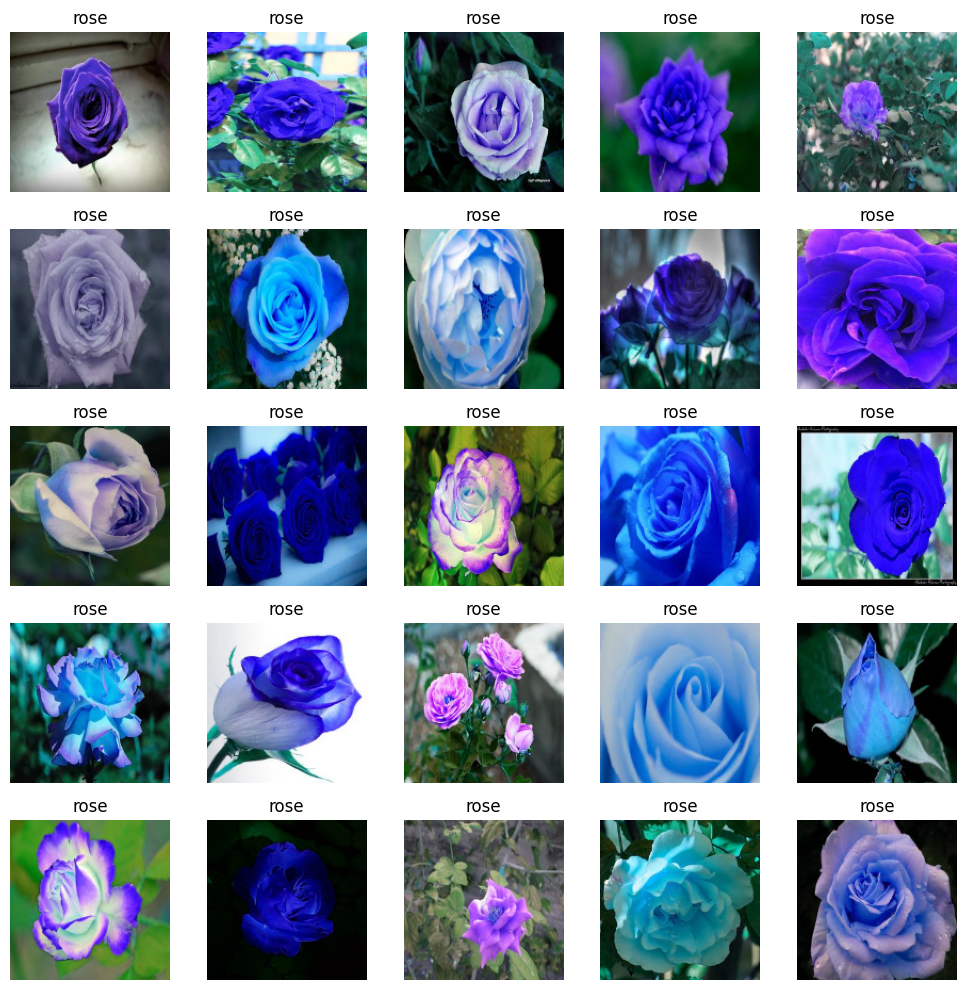

In [ ]:
import matplotlib.pyplot as plt

# Display 25 images with their labels
def display_images(X, Y, label_encoder, num_images=25):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.imshow(X[i])  # Display the normalized image
        label = label_encoder.inverse_transform([np.argmax(Y[i])])  # Decode the one-hot label
        plt.title(label[0])  # Set the title as the label
        plt.axis('off')  # Turn off axis
    plt.tight_layout()
    plt.show()

# Call the function to display 25 images and their labels
display_images(X_train, Y_train_categorical, label_encoder, num_images=25)


Index 0: tulip
Index 1: tulip
Index 2: tulip
Index 3: tulip
Index 4: tulip
Index 5: tulip
Index 6: tulip
Index 7: tulip
Index 8: tulip
Index 9: tulip
Index 10: tulip
Index 11: tulip
Index 12: tulip
Index 13: tulip
Index 14: tulip
Index 15: tulip
Index 16: tulip
Index 17: tulip
Index 18: tulip
Index 19: tulip
Index 20: tulip
Index 21: tulip
Index 22: tulip
Index 23: tulip
Index 24: tulip
Index 25: tulip
Index 26: tulip
Index 27: tulip
Index 28: tulip
Index 29: tulip
Index 30: tulip
Index 31: tulip
Index 32: tulip
Index 33: tulip
Index 34: tulip
Index 35: tulip
Index 36: tulip
Index 37: tulip
Index 38: tulip
Index 39: tulip
Index 40: tulip
Index 41: tulip
Index 42: tulip
Index 43: tulip
Index 44: tulip
Index 45: tulip
Index 46: tulip
Index 47: tulip
Index 48: tulip
Index 49: tulip
Index 50: tulip
Index 51: tulip
Index 52: tulip
Index 53: tulip
Index 54: tulip
Index 55: tulip
Index 56: tulip
Index 57: tulip
Index 58: tulip
Index 59: tulip
Index 60: tulip
Index 61: tulip
Index 62: tulip
In

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input, Dropout

# Define the CNN model
model = Sequential()
model.add(Input(shape=(150, 150, 3)))  # Adjust input shape to (150, 150, 3)

# First Convolutional Block
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Second Convolutional Block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Third Convolutional Block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Fourth Convolutional Block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten and Fully Connected Layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization

# Output Layer
model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Adjust to the number of classes

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # For multi-class classification
    metrics=['accuracy']
)

# Display model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │           8,208 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,460,816 (13.20 MB)

 Trainable params: 3,460,816 (13.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, Y_train_categorical,
    epochs=16,  # Adjust number of epochs as needed
    batch_size=32,  # Use appropriate batch size
    validation_data=(X_test, Y_test_categorical)
)

acc_curve = history.history['accuracy']
val_acc_curve = history.history['val_accuracy']
plt.plot(acc_curve,label='train')
plt.plot(val_acc_curve)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define train and test data directories
#train_dir = '/content/drive/MyDrive/flowers_dataset/flowers/train'
#test_dir = '/content/drive/MyDrive/flowers_dataset/flowers/test'

train_dir = '/content/drive/MyDrive/flowers/train'
test_dir = '/content/drive/MyDrive/flowers/test'

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),  # Resize images
    batch_size=32,
    class_mode='categorical'  # One-hot encode labels
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),  # Resize images
    batch_size=32,
    class_mode='categorical'  # One-hot encode labels
)


Found 12592 images belonging to 16 classes.
Found 3148 images belonging to 16 classes.


## Mn Hna BDIT l'architecure
////////////////////////////////////////////////////////////////////////////////
> Ajouter une citation




In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input, Dropout

# Define the CNN model
model = Sequential()
model.add(Input(shape=(256, 256, 3)))  # Adjust input shape to (150, 150, 3)

# First Convolutional Block
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Second Convolutional Block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Third Convolutional Block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Fourth Convolutional Block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten and Fully Connected Layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization

# Output Layer
model.add(Dense(16, activation='softmax'))  # Adjust to the number of classes

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # For multi-class classification
    metrics=['accuracy']
)

# Display model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │           8,208 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,460,816 (13.20 MB)

 Trainable params: 3,460,816 (13.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model using the data generators
history = model.fit(
    train_generator,
    epochs=50,  # Adjust the number of epochs
    validation_data=test_generator
)
import matplotlib.pyplot as plt

# Plot training and validation accuracy
acc_curve = history.history['accuracy']
val_acc_curve = history.history['val_accuracy']
plt.plot(acc_curve, label='Train Accuracy')
plt.plot(val_acc_curve, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


394/394 ━━━━━━━━━━━━━━━━━━━━ 87s 200ms/step - accuracy: 0.2379 - loss: 2.2207 - val_accuracy: 0.5232 - val_loss: 1.4294
Epoch 2/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 124s 168ms/step - accuracy: 0.5018 - loss: 1.4679 - val_accuracy: 0.5874 - val_loss: 1.2214
Epoch 3/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 89s 187ms/step - accuracy: 0.6184 - loss: 1.1615 - val_accuracy: 0.6595 - val_loss: 1.0373
Epoch 4/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 81s 186ms/step - accuracy: 0.6851 - loss: 0.9237 - val_accuracy: 0.6753 - val_loss: 0.9902
Epoch 5/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 67s 167ms/step - accuracy: 0.7443 - loss: 0.7569 - val_accuracy: 0.7074 - val_loss: 0.8956
Epoch 6/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 66s 166ms/step - accuracy: 0.8052 - loss: 0.5620 - val_accuracy: 0.7084 - val_loss: 0.9309
Epoch 7/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 81s 165ms/step - accuracy: 0.8523 - loss: 0.4438 - val_accuracy: 0.7116 - val_loss: 0.9593
Epoch 8/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 82s 165ms/step - accuracy: 0.8784 - loss: 0.3541 - va

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input, Dropout, BatchNormalization

# Define the CNN model
model2 = Sequential()
model2.add(Input(shape=(256, 256, 3)))  # Input shape for 256x256 RGB images

# First Convolutional Block
model2.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model2.add(BatchNormalization())  # Normalize activations
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.25))

# Second Convolutional Block
model2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.25))

# Third Convolutional Block
model2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.3))

# Fourth Convolutional Block
model2.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.3))

# Flatten and Fully Connected Layers
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

# Output Layer
model2.add(Dense(16, activation='softmax'))  # 16 classes for output

# Compile the model
model2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # For multi-class classification
    metrics=['accuracy']
)

# Display model summary
model2.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256, 256, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      33,554,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │              

 Total params: 33,955,536 (129.53 MB)

 Trainable params: 33,953,552 (129.52 MB)

 Non-trainable params: 1,984 (7.75 KB)

Epoch 1/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 115s 251ms/step - accuracy: 0.2863 - loss: 2.6114 - val_accuracy: 0.1331 - val_loss: 3.1981
Epoch 2/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 118s 217ms/step - accuracy: 0.5020 - loss: 1.5813 - val_accuracy: 0.5778 - val_loss: 1.2981
Epoch 3/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 80s 200ms/step - accuracy: 0.6177 - loss: 1.1654 - val_accuracy: 0.6302 - val_loss: 1.1569
Epoch 4/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 79s 198ms/step - accuracy: 0.6970 - loss: 0.9123 - val_accuracy: 0.5181 - val_loss: 1.6273
Epoch 5/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 80s 199ms/step - accuracy: 0.7524 - loss: 0.7390 - val_accuracy: 0.4225 - val_loss: 2.9442
Epoch 6/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 89s 217ms/step - accuracy: 0.7818 - loss: 0.6557 - val_accuracy: 0.6207 - val_loss: 1.4111
Epoch 7/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 79s 199ms/step - accuracy: 0.8497 - loss: 0.4417 - val_accuracy: 0.6566 - val_loss: 1.2429
Epoch 8/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 82s 199ms/step - accuracy: 0.8957 - loss:

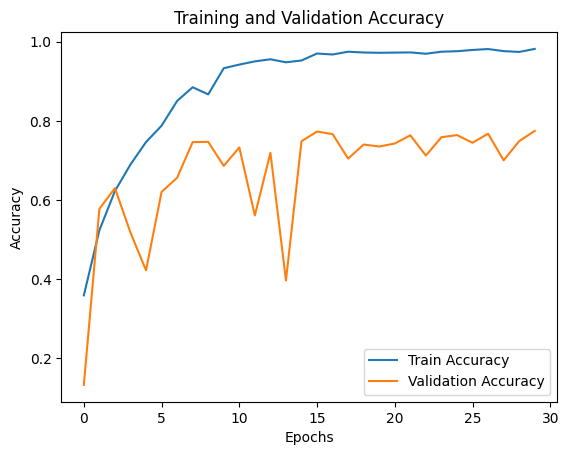

In [ ]:
# Train the model using the data generators
history2 = model2.fit(
    train_generator,
    epochs=30,  # Adjust the number of epochs
    validation_data=test_generator
)
import matplotlib.pyplot as plt

# Plot training and validation accuracy
acc_curve = history2.history['accuracy']
val_acc_curve = history2.history['val_accuracy']
plt.plot(acc_curve, label='Train Accuracy')
plt.plot(val_acc_curve, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


In [ ]:
model2.save('/content/drive/MyDrive/flower_mobilenetv2_model.h5')


## Ajouter d'autre image

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Définir le répertoire source (où se trouvent vos images) et le répertoire cible
source_dir = '/content/drive/MyDrive/flowers/train'
output_dir = '/content/drive/MyDrive/flowers/augmented_train'

# Créer le répertoire cible si nécessaire
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Configuration pour l'augmentation des images
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,          # Rotation aléatoire jusqu'à 20 degrés
    width_shift_range=0.2,      # Décalage horizontal
    height_shift_range=0.2,     # Décalage vertical
    shear_range=0.2,            # Transformation en cisaillement
    zoom_range=0.2,             # Zoom
    horizontal_flip=True,       # Retour horizontal
    fill_mode='nearest'         # Remplissage des pixels vides
)

# Parcourir chaque classe dans le répertoire source
for class_name in os.listdir(source_dir):
    class_path = os.path.join(source_dir, class_name)
    if os.path.isdir(class_path):
        # Créer un répertoire pour cette classe dans le répertoire cible
        augmented_class_path = os.path.join(output_dir, class_name)
        if not os.path.exists(augmented_class_path):
            os.makedirs(augmented_class_path)

        # Charger les images de cette classe
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)

            # Charger l'image
            from tensorflow.keras.preprocessing.image import load_img, img_to_array
            img = load_img(image_path)  # Charger l'image
            x = img_to_array(img)       # Convertir en tableau NumPy
            x = x.reshape((1,) + x.shape)  # Ajouter une dimension pour le lot

            # Générer et sauvegarder 5 augmentations
            i = 0
            for batch in datagen.flow(x, batch_size=1, save_to_dir=augmented_class_path,
                                      save_prefix='aug', save_format='jpg'):
                i += 1
                if i >= 5:  # Générer 5 images augmentées par image originale
                    break


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
train_dir = '/content/drive/MyDrive/flowers/augmented_train'
test_dir = '/content/drive/MyDrive/flowers/test'

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)  # Normalisation des pixels
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Dimension des images
    batch_size=128,
    class_mode='categorical'  # One-hot encoding
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  # Dimension des images
    batch_size=128,
    class_mode='categorical'  # One-hot encoding
)

Found 52121 images belonging to 16 classes.
Found 3148 images belonging to 16 classes.


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input, Dropout

# Define the CNN model
model_aug = Sequential()
model_aug.add(Input(shape=(150, 150, 3)))  # Adjust input shape to (150, 150, 3)

# First Convolutional Block
model_aug.add(Conv2D(32, (3, 3), activation='relu'))
model_aug.add(MaxPooling2D((2, 2)))

# Second Convolutional Block
model_aug.add(Conv2D(64, (3, 3), activation='relu'))
model_aug.add(MaxPooling2D((2, 2)))

# Third Convolutional Block
model_aug.add(Conv2D(128, (3, 3), activation='relu'))
model_aug.add(MaxPooling2D((2, 2)))

# Fourth Convolutional Block
model_aug.add(Conv2D(128, (3, 3), activation='relu'))
model_aug.add(MaxPooling2D((2, 2)))

# Flatten and Fully Connected Layers
model_aug.add(Flatten())
model_aug.add(Dense(512, activation='relu'))
model_aug.add(Dropout(0.5))  # Dropout for regularization

# Output Layer
model_aug.add(Dense(16, activation='softmax'))  # Adjust to the number of classes

# Compile the model_aug
model_aug.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # For multi-class classification
    metrics=['accuracy']
)

# Display model summary
model_aug.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │           8,208 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,460,816 (13.20 MB)

 Trainable params: 3,460,816 (13.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model using the data generators
history_aug = model_aug.fit(
    train_generator,
    epochs=50,  # Adjust the number of epochs
    validation_data=test_generator
)
import matplotlib.pyplot as plt

# Plot training and validation accuracy
acc_curve = history_aug.history['accuracy']
val_acc_curve = history_aug.history['val_accuracy']
plt.plot(acc_curve, label='Train Accuracy')
plt.plot(val_acc_curve, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


408/408 ━━━━━━━━━━━━━━━━━━━━ 0s 600ms/step - accuracy: 0.3142 - loss: 1.9912

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input, Dropout

# Define the CNN model
model2_aug = Sequential()
model2_aug.add(Input(shape=(150, 150, 3)))  # Adjust input shape to (150, 150, 3)

# First Convolutional Block
model2_aug.add(Conv2D(32, (3, 3), activation='relu'))
model2_aug.add(MaxPooling2D((2, 2)))
model2_aug.add(Dropout(0.2))

# Second Convolutional Block
model2_aug.add(Conv2D(64, (3, 3), activation='relu'))
model2_aug.add(MaxPooling2D((2, 2)))
model2_aug.add(Dropout(0.2))


# Third Convolutional Block
model2_aug.add(Conv2D(128, (3, 3), activation='relu'))
model2_aug.add(MaxPooling2D((2, 2)))
model2_aug.add(Dropout(0.2))


# Fourth Convolutional Block
model2_aug.add(Conv2D(128, (3, 3), activation='relu'))
model2_aug.add(MaxPooling2D((2, 2)))
model2_aug.add(Dropout(0.2))


# Flatten and Fully Connected Layers
model2_aug.add(Flatten())
model2_aug.add(Dense(512, activation='relu'))
model2_aug.add(Dropout(0.5))  # Dropout for regularization

# Output Layer
model2_aug.add(Dense(16, activation='softmax'))  # Adjust to the number of classes

# Compile the model2_aug
model2_aug.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # For multi-class classification
    metrics=['accuracy']
)

# Display model2_aug summary
model2_aug.summary()


In [ ]:
# Train the model using the data generators
history2_aug = model2_aug.fit(
    train_generator,
    epochs=50,  # Adjust the number of epochs
    validation_data=test_generator
)
import matplotlib.pyplot as plt

# Plot training and validation accuracy
acc_curve = history2_aug.history['accuracy']
val_acc_curve = history2_aug.history['val_accuracy']
plt.plot(acc_curve, label='Train Accuracy')
plt.plot(val_acc_curve, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


## Transfert Learning

In [ ]:
train_dir = '/content/drive/MyDrive/flowers/train'
test_dir = '/content/drive/MyDrive/flowers/test'

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Resize images to MobileNetV2 input size
    batch_size=32,
    class_mode='categorical'  # One-hot encode labels
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),  # Resize images to MobileNetV2 input size
    batch_size=32,
    class_mode='categorical'  # One-hot encode labels
)

Found 12592 images belonging to 16 classes.
Found 3148 images belonging to 16 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the base model layers
base_model.trainable = False


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)  # Output layer


In [ ]:
from tensorflow.keras.optimizers import Adam

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),  # Adjust learning rate as needed
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,  # Adjust number of epochs
    verbose=1
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


394/394 ━━━━━━━━━━━━━━━━━━━━ 155s 229ms/step - accuracy: 0.3880 - loss: 2.0373 - val_accuracy: 0.8231 - val_loss: 0.6548
Epoch 2/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 128s 208ms/step - accuracy: 0.7825 - loss: 0.7167 - val_accuracy: 0.8631 - val_loss: 0.4731
Epoch 3/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 81s 204ms/step - accuracy: 0.8443 - loss: 0.5278 - val_accuracy: 0.8742 - val_loss: 0.4118
Epoch 4/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 76s 190ms/step - accuracy: 0.8729 - loss: 0.4252 - val_accuracy: 0.8841 - val_loss: 0.3664
Epoch 5/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 81s 203ms/step - accuracy: 0.8876 - loss: 0.3681 - val_accuracy: 0.8926 - val_loss: 0.3493
Epoch 6/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 78s 192ms/step - accuracy: 0.9022 - loss: 0.3186 - val_accuracy: 0.8968 - val_loss: 0.3329
Epoch 7/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 81s 189ms/step - accuracy: 0.9119 - loss: 0.2871 - val_accuracy: 0.8987 - val_loss: 0.3232
Epoch 8/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 83s 208ms/step - accuracy: 0.9183 - loss: 0.2645 - v

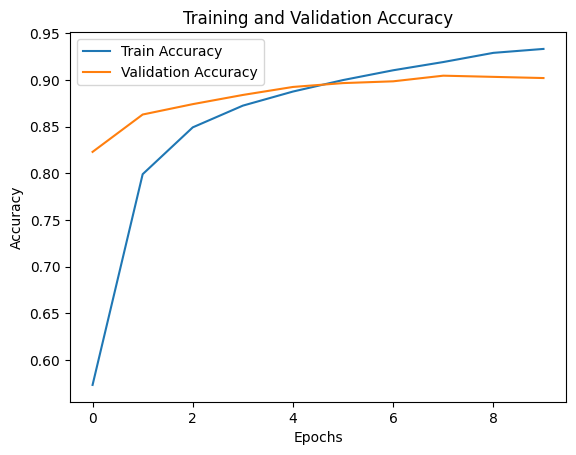

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
acc_curve = history.history['accuracy']
val_acc_curve = history.history['val_accuracy']
plt.plot(acc_curve, label='Train Accuracy')
plt.plot(val_acc_curve, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/flower_mobilenetv2_model2.h5')
